<a href="https://www.pieriandata.com"><img src="../Pierian_Data_Logo.PNG"></a>
<strong><center>Copyright by Pierian Data Inc.</center></strong> 
<strong><center>Created by Jose Marcial Portilla.</center></strong>

# Keras TF 2.0 - Code Along Classification Project

Let's explore a classification task with Keras API for TF 2.0

## The Data

### Breast cancer wisconsin (diagnostic) dataset
--------------------------------------------

**Data Set Characteristics:**

    Number of Instances: 569

    Number of Attributes: 30 numeric, predictive attributes and the class

    Attribute Information:
        - radius (mean of distances from center to points on the perimeter)
        - texture (standard deviation of gray-scale values)
        - perimeter
        - area
        - smoothness (local variation in radius lengths)
        - compactness (perimeter^2 / area - 1.0)
        - concavity (severity of concave portions of the contour)
        - concave points (number of concave portions of the contour)
        - symmetry 
        - fractal dimension ("coastline approximation" - 1)

        The mean, standard error, and "worst" or largest (mean of the three
        largest values) of these features were computed for each image,
        resulting in 30 features.  For instance, field 3 is Mean Radius, field
        13 is Radius SE, field 23 is Worst Radius.

        - class:
                - WDBC-Malignant
                - WDBC-Benign

    Summary Statistics:

    ===================================== ====== ======
                                           Min    Max
    ===================================== ====== ======
    radius (mean):                        6.981  28.11
    texture (mean):                       9.71   39.28
    perimeter (mean):                     43.79  188.5
    area (mean):                          143.5  2501.0
    smoothness (mean):                    0.053  0.163
    compactness (mean):                   0.019  0.345
    concavity (mean):                     0.0    0.427
    concave points (mean):                0.0    0.201
    symmetry (mean):                      0.106  0.304
    fractal dimension (mean):             0.05   0.097
    radius (standard error):              0.112  2.873
    texture (standard error):             0.36   4.885
    perimeter (standard error):           0.757  21.98
    area (standard error):                6.802  542.2
    smoothness (standard error):          0.002  0.031
    compactness (standard error):         0.002  0.135
    concavity (standard error):           0.0    0.396
    concave points (standard error):      0.0    0.053
    symmetry (standard error):            0.008  0.079
    fractal dimension (standard error):   0.001  0.03
    radius (worst):                       7.93   36.04
    texture (worst):                      12.02  49.54
    perimeter (worst):                    50.41  251.2
    area (worst):                         185.2  4254.0
    smoothness (worst):                   0.071  0.223
    compactness (worst):                  0.027  1.058
    concavity (worst):                    0.0    1.252
    concave points (worst):               0.0    0.291
    symmetry (worst):                     0.156  0.664
    fractal dimension (worst):            0.055  0.208
    ===================================== ====== ======

    Missing Attribute Values: None

    Class Distribution: 212 - Malignant, 357 - Benign

    Creator:  Dr. William H. Wolberg, W. Nick Street, Olvi L. Mangasarian

    Donor: Nick Street

    Date: November, 1995

This is a copy of UCI ML Breast Cancer Wisconsin (Diagnostic) datasets.
https://goo.gl/U2Uwz2

Features are computed from a digitized image of a fine needle
aspirate (FNA) of a breast mass.  They describe
characteristics of the cell nuclei present in the image.

Separating plane described above was obtained using
Multisurface Method-Tree (MSM-T) [K. P. Bennett, "Decision Tree
Construction Via Linear Programming." Proceedings of the 4th
Midwest Artificial Intelligence and Cognitive Science Society,
pp. 97-101, 1992], a classification method which uses linear
programming to construct a decision tree.  Relevant features
were selected using an exhaustive search in the space of 1-4
features and 1-3 separating planes.

The actual linear program used to obtain the separating plane
in the 3-dimensional space is that described in:
[K. P. Bennett and O. L. Mangasarian: "Robust Linear
Programming Discrimination of Two Linearly Inseparable Sets",
Optimization Methods and Software 1, 1992, 23-34].

This database is also available through the UW CS ftp server:

ftp ftp.cs.wisc.edu
cd math-prog/cpo-dataset/machine-learn/WDBC/

.. topic:: References

   - W.N. Street, W.H. Wolberg and O.L. Mangasarian. Nuclear feature extraction 
     for breast tumor diagnosis. IS&T/SPIE 1993 International Symposium on 
     Electronic Imaging: Science and Technology, volume 1905, pages 861-870,
     San Jose, CA, 1993.
   - O.L. Mangasarian, W.N. Street and W.H. Wolberg. Breast cancer diagnosis and 
     prognosis via linear programming. Operations Research, 43(4), pages 570-577, 
     July-August 1995.
   - W.H. Wolberg, W.N. Street, and O.L. Mangasarian. Machine learning techniques
     to diagnose breast cancer from fine-needle aspirates. Cancer Letters 77 (1994) 
     163-171.

In [1]:
import pandas as pd
import numpy as np

In [2]:
df = pd.read_csv('../DATA/cancer_classification.csv')

In [3]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 569 entries, 0 to 568
Data columns (total 31 columns):
 #   Column                   Non-Null Count  Dtype  
---  ------                   --------------  -----  
 0   mean radius              569 non-null    float64
 1   mean texture             569 non-null    float64
 2   mean perimeter           569 non-null    float64
 3   mean area                569 non-null    float64
 4   mean smoothness          569 non-null    float64
 5   mean compactness         569 non-null    float64
 6   mean concavity           569 non-null    float64
 7   mean concave points      569 non-null    float64
 8   mean symmetry            569 non-null    float64
 9   mean fractal dimension   569 non-null    float64
 10  radius error             569 non-null    float64
 11  texture error            569 non-null    float64
 12  perimeter error          569 non-null    float64
 13  area error               569 non-null    float64
 14  smoothness error         5

In [4]:
df.describe().transpose()

,count,mean,std,min,25%,50%,75%,max
mean radius,569.0,14.127292,3.524049,6.981000,11.700000,13.370000,15.780000,28.11000
mean texture,569.0,19.289649,4.301036,9.710000,16.170000,18.840000,21.800000,39.28000
mean perimeter,569.0,91.969033,24.298981,43.790000,75.170000,86.240000,104.100000,188.50000
mean area,569.0,654.889104,351.914129,143.500000,420.300000,551.100000,782.700000,2501.00000
mean smoothness,569.0,0.096360,0.014064,0.052630,0.086370,0.095870,0.105300,0.16340
mean compactness,569.0,0.104341,0.052813,0.019380,0.064920,0.092630,0.130400,0.34540
mean concavity,569.0,0.088799,0.079720,0.000000,0.029560,0.061540,0.130700,0.42680
mean concave points,569.0,0.048919,0.038803,0.000000,0.020310,0.033500,0.074000,0.20120
mean symmetry,569.0,0.181162,0.027414,0.106000,0.161900,0.179200,0.195700,0.30400
mean fractal dimension,569.0,0.062798,0.007060,0.049960,0.057700,0.061540,0.066120,0.09744


## EDA

In [5]:
import seaborn as sns
import matplotlib.pyplot as plt

<AxesSubplot:xlabel='benign_0__mal_1', ylabel='count'>

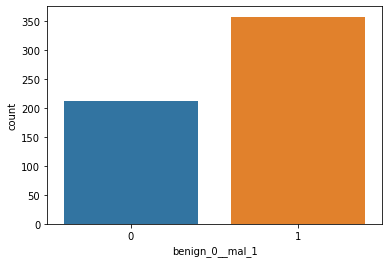

In [6]:
sns.countplot(x='benign_0__mal_1',data=df)

<AxesSubplot:>

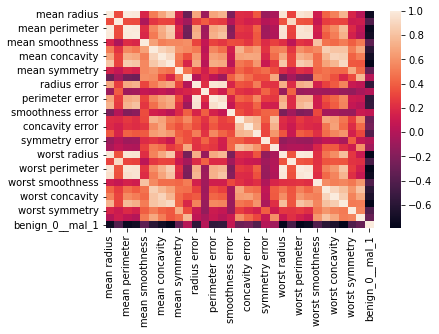

In [7]:
sns.heatmap(df.corr())

In [8]:
df.corr()['benign_0__mal_1'].sort_values()

worst concave points      -0.793566
worst perimeter           -0.782914
mean concave points       -0.776614
worst radius              -0.776454
mean perimeter            -0.742636
worst area                -0.733825
mean radius               -0.730029
mean area                 -0.708984
mean concavity            -0.696360
worst concavity           -0.659610
mean compactness          -0.596534
worst compactness         -0.590998
radius error              -0.567134
perimeter error           -0.556141
area error                -0.548236
worst texture             -0.456903
worst smoothness          -0.421465
worst symmetry            -0.416294
mean texture              -0.415185
concave points error      -0.408042
mean smoothness           -0.358560
mean symmetry             -0.330499
worst fractal dimension   -0.323872
compactness error         -0.292999
concavity error           -0.253730
fractal dimension error   -0.077972
symmetry error             0.006522
texture error              0

<AxesSubplot:>

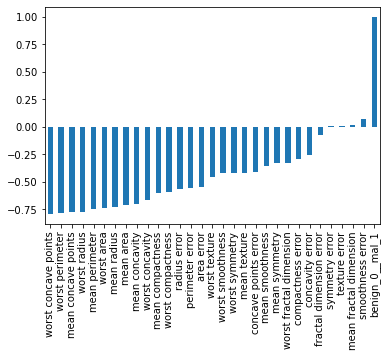

In [9]:
df.corr()['benign_0__mal_1'].sort_values().plot(kind='bar')

<AxesSubplot:>

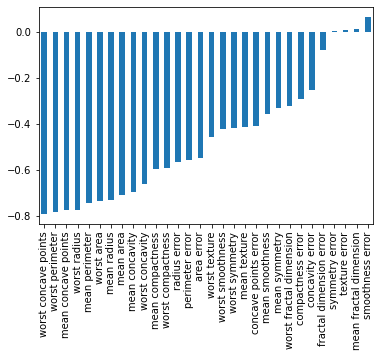

In [10]:
df.corr()['benign_0__mal_1'][:-1].sort_values().plot(kind='bar')

## Train Test Split

In [11]:
X = df.drop('benign_0__mal_1',axis=1).values
y = df['benign_0__mal_1'].values

In [12]:
from sklearn.model_selection import train_test_split

In [13]:
X_train, X_test, y_train, y_test = train_test_split(X,y,test_size=0.25,random_state=101)


## Scaling Data

In [14]:
from sklearn.preprocessing import MinMaxScaler

In [15]:
scaler = MinMaxScaler()

In [16]:
scaler.fit(X_train)

MinMaxScaler()

In [17]:
X_train = scaler.transform(X_train)
X_test = scaler.transform(X_test)

## Creating the Model

    # For a binary classification problem
    model.compile(optimizer='rmsprop',
                  loss='binary_crossentropy',
                  metrics=['accuracy'])
                  
    

In [18]:
import tensorflow as tf
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Activation,Dropout

In [19]:
X_train.shape

(426, 30)

In [20]:
model = Sequential()

# https://stats.stackexchange.com/questions/181/how-to-choose-the-number-of-hidden-layers-and-nodes-in-a-feedforward-neural-netw

model.add(Dense(units=30,activation='relu'))

model.add(Dense(units=15,activation='relu'))


model.add(Dense(units=1,activation='sigmoid'))

# For a binary classification problem
model.compile(loss='binary_crossentropy', optimizer='adam')

2021-12-27 12:05:46.048113: I tensorflow/compiler/jit/xla_cpu_device.cc:41] Not creating XLA devices, tf_xla_enable_xla_devices not set
2021-12-27 12:05:46.048357: I tensorflow/core/platform/cpu_feature_guard.cc:142] This TensorFlow binary is optimized with oneAPI Deep Neural Network Library (oneDNN) to use the following CPU instructions in performance-critical operations:  AVX2 FMA
To enable them in other operations, rebuild TensorFlow with the appropriate compiler flags.


## Training the Model 

### Example One: Choosing too many epochs and overfitting!

In [21]:
# https://stats.stackexchange.com/questions/164876/tradeoff-batch-size-vs-number-of-iterations-to-train-a-neural-network
# https://datascience.stackexchange.com/questions/18414/are-there-any-rules-for-choosing-the-size-of-a-mini-batch

model.fit(x=X_train, 
          y=y_train, 
          epochs=600,
          validation_data=(X_test, y_test), verbose=1
          )

2021-12-27 12:07:46.527676: I tensorflow/compiler/mlir/mlir_graph_optimization_pass.cc:116] None of the MLIR optimization passes are enabled (registered 2)


Epoch 1/600
14/14 [==============================] - 1s 40ms/step - loss: 0.6584 - val_loss: 0.6213
Epoch 2/600
14/14 [==============================] - 0s 3ms/step - loss: 0.6009 - val_loss: 0.5640
Epoch 3/600
14/14 [==============================] - 0s 2ms/step - loss: 0.5417 - val_loss: 0.5022
Epoch 4/600
14/14 [==============================] - 0s 2ms/step - loss: 0.4795 - val_loss: 0.4413
Epoch 5/600
14/14 [==============================] - 0s 2ms/step - loss: 0.4218 - val_loss: 0.3885
Epoch 6/600
14/14 [==============================] - 0s 2ms/step - loss: 0.3752 - val_loss: 0.3435
Epoch 7/600
14/14 [==============================] - 0s 2ms/step - loss: 0.3364 - val_loss: 0.3068
Epoch 8/600
14/14 [==============================] - 0s 2ms/step - loss: 0.3182 - val_loss: 0.2779
Epoch 9/600
14/14 [==============================] - 0s 2ms/step - loss: 0.2860 - val_loss: 0.2510
Epoch 10/600
14/14 [==============================] - 0s 2ms/step - loss: 0.2423 - val_loss: 0.2323
Epoch 11

14/14 [==============================] - 0s 3ms/step - loss: 0.0378 - val_loss: 0.1184
Epoch 84/600
14/14 [==============================] - 0s 2ms/step - loss: 0.0455 - val_loss: 0.1104
Epoch 85/600
14/14 [==============================] - 0s 2ms/step - loss: 0.0549 - val_loss: 0.1191
Epoch 86/600
14/14 [==============================] - 0s 2ms/step - loss: 0.0510 - val_loss: 0.1168
Epoch 87/600
14/14 [==============================] - 0s 2ms/step - loss: 0.0411 - val_loss: 0.1162
Epoch 88/600
14/14 [==============================] - 0s 2ms/step - loss: 0.0550 - val_loss: 0.1127
Epoch 89/600
14/14 [==============================] - 0s 2ms/step - loss: 0.0707 - val_loss: 0.1140
Epoch 90/600
14/14 [==============================] - 0s 2ms/step - loss: 0.0458 - val_loss: 0.1181
Epoch 91/600
14/14 [==============================] - 0s 2ms/step - loss: 0.0566 - val_loss: 0.1159
Epoch 92/600
14/14 [==============================] - 0s 2ms/step - loss: 0.0765 - val_loss: 0.1189
Epoch 93/600


14/14 [==============================] - 0s 2ms/step - loss: 0.0383 - val_loss: 0.1257
Epoch 165/600
14/14 [==============================] - 0s 2ms/step - loss: 0.0291 - val_loss: 0.1302
Epoch 166/600
14/14 [==============================] - 0s 2ms/step - loss: 0.0338 - val_loss: 0.1330
Epoch 167/600
14/14 [==============================] - 0s 2ms/step - loss: 0.0366 - val_loss: 0.1292
Epoch 168/600
14/14 [==============================] - 0s 3ms/step - loss: 0.0291 - val_loss: 0.1293
Epoch 169/600
14/14 [==============================] - 0s 3ms/step - loss: 0.0316 - val_loss: 0.1316
Epoch 170/600
14/14 [==============================] - 0s 3ms/step - loss: 0.0381 - val_loss: 0.1320
Epoch 171/600
14/14 [==============================] - 0s 2ms/step - loss: 0.0257 - val_loss: 0.1313
Epoch 172/600
14/14 [==============================] - 0s 2ms/step - loss: 0.0379 - val_loss: 0.1240
Epoch 173/600
14/14 [==============================] - 0s 2ms/step - loss: 0.0282 - val_loss: 0.1336
Epoc

14/14 [==============================] - 0s 3ms/step - loss: 0.0215 - val_loss: 0.1273
Epoch 246/600
14/14 [==============================] - 0s 2ms/step - loss: 0.0195 - val_loss: 0.1475
Epoch 247/600
14/14 [==============================] - 0s 2ms/step - loss: 0.0201 - val_loss: 0.1255
Epoch 248/600
14/14 [==============================] - 0s 2ms/step - loss: 0.0192 - val_loss: 0.1460
Epoch 249/600
14/14 [==============================] - 0s 2ms/step - loss: 0.0173 - val_loss: 0.1294
Epoch 250/600
14/14 [==============================] - 0s 2ms/step - loss: 0.0248 - val_loss: 0.1388
Epoch 251/600
14/14 [==============================] - 0s 2ms/step - loss: 0.0204 - val_loss: 0.1447
Epoch 252/600
14/14 [==============================] - 0s 2ms/step - loss: 0.0270 - val_loss: 0.1319
Epoch 253/600
14/14 [==============================] - 0s 2ms/step - loss: 0.0184 - val_loss: 0.1450
Epoch 254/600
14/14 [==============================] - 0s 2ms/step - loss: 0.0325 - val_loss: 0.1336
Epoc

14/14 [==============================] - 0s 2ms/step - loss: 0.0179 - val_loss: 0.1466
Epoch 327/600
14/14 [==============================] - 0s 2ms/step - loss: 0.0134 - val_loss: 0.1778
Epoch 328/600
14/14 [==============================] - 0s 2ms/step - loss: 0.0145 - val_loss: 0.1544
Epoch 329/600
14/14 [==============================] - 0s 2ms/step - loss: 0.0154 - val_loss: 0.1677
Epoch 330/600
14/14 [==============================] - 0s 2ms/step - loss: 0.0120 - val_loss: 0.1768
Epoch 331/600
14/14 [==============================] - 0s 2ms/step - loss: 0.0126 - val_loss: 0.1628
Epoch 332/600
14/14 [==============================] - 0s 2ms/step - loss: 0.0126 - val_loss: 0.1970
Epoch 333/600
14/14 [==============================] - 0s 2ms/step - loss: 0.0194 - val_loss: 0.1654
Epoch 334/600
14/14 [==============================] - 0s 3ms/step - loss: 0.0117 - val_loss: 0.1762
Epoch 335/600
14/14 [==============================] - 0s 3ms/step - loss: 0.0144 - val_loss: 0.1661
Epoc

14/14 [==============================] - 0s 2ms/step - loss: 0.0114 - val_loss: 0.2332
Epoch 408/600
14/14 [==============================] - 0s 2ms/step - loss: 0.0051 - val_loss: 0.2300
Epoch 409/600
14/14 [==============================] - 0s 2ms/step - loss: 0.0064 - val_loss: 0.2376
Epoch 410/600
14/14 [==============================] - 0s 2ms/step - loss: 0.0068 - val_loss: 0.2469
Epoch 411/600
14/14 [==============================] - 0s 2ms/step - loss: 0.0083 - val_loss: 0.2356
Epoch 412/600
14/14 [==============================] - 0s 2ms/step - loss: 0.0076 - val_loss: 0.2307
Epoch 413/600
14/14 [==============================] - 0s 3ms/step - loss: 0.0094 - val_loss: 0.2333
Epoch 414/600
14/14 [==============================] - 0s 2ms/step - loss: 0.0061 - val_loss: 0.2430
Epoch 415/600
14/14 [==============================] - 0s 2ms/step - loss: 0.0109 - val_loss: 0.2360
Epoch 416/600
14/14 [==============================] - 0s 2ms/step - loss: 0.0098 - val_loss: 0.2402
Epoc

14/14 [==============================] - 0s 2ms/step - loss: 0.0061 - val_loss: 0.3055
Epoch 489/600
14/14 [==============================] - 0s 2ms/step - loss: 0.0045 - val_loss: 0.3023
Epoch 490/600
14/14 [==============================] - 0s 2ms/step - loss: 0.0045 - val_loss: 0.3055
Epoch 491/600
14/14 [==============================] - 0s 2ms/step - loss: 0.0056 - val_loss: 0.2851
Epoch 492/600
14/14 [==============================] - 0s 2ms/step - loss: 0.0057 - val_loss: 0.3327
Epoch 493/600
14/14 [==============================] - 0s 2ms/step - loss: 0.0052 - val_loss: 0.2901
Epoch 494/600
14/14 [==============================] - 0s 2ms/step - loss: 0.0069 - val_loss: 0.3064
Epoch 495/600
14/14 [==============================] - 0s 2ms/step - loss: 0.0047 - val_loss: 0.2998
Epoch 496/600
14/14 [==============================] - 0s 2ms/step - loss: 0.0068 - val_loss: 0.3056
Epoch 497/600
14/14 [==============================] - 0s 2ms/step - loss: 0.0035 - val_loss: 0.3092
Epoc

14/14 [==============================] - 0s 2ms/step - loss: 0.0033 - val_loss: 0.3768
Epoch 570/600
14/14 [==============================] - 0s 2ms/step - loss: 0.0023 - val_loss: 0.3701
Epoch 571/600
14/14 [==============================] - 0s 2ms/step - loss: 0.0023 - val_loss: 0.3591
Epoch 572/600
14/14 [==============================] - 0s 2ms/step - loss: 0.0030 - val_loss: 0.4896
Epoch 573/600
14/14 [==============================] - 0s 2ms/step - loss: 0.0170 - val_loss: 0.3153
Epoch 574/600
14/14 [==============================] - 0s 2ms/step - loss: 0.0051 - val_loss: 0.3223
Epoch 575/600
14/14 [==============================] - 0s 2ms/step - loss: 0.0076 - val_loss: 0.3638
Epoch 576/600
14/14 [==============================] - 0s 2ms/step - loss: 0.0114 - val_loss: 0.3644
Epoch 577/600
14/14 [==============================] - 0s 2ms/step - loss: 0.0326 - val_loss: 0.3567
Epoch 578/600
14/14 [==============================] - 0s 2ms/step - loss: 0.0042 - val_loss: 0.3378
Epoc

In [113]:
# model.history.history

In [22]:
model_loss = pd.DataFrame(model.history.history)

In [115]:
# model_loss

<AxesSubplot:>

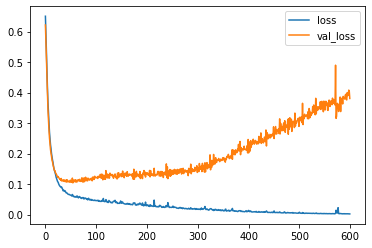

In [23]:
model_loss.plot()

## Example Two: Early Stopping

We obviously trained too much! Let's use early stopping to track the val_loss and stop training once it begins increasing too much!

In [24]:
model = Sequential()
model.add(Dense(units=30,activation='relu'))
model.add(Dense(units=15,activation='relu'))
model.add(Dense(units=1,activation='sigmoid'))
model.compile(loss='binary_crossentropy', optimizer='adam')

In [25]:
from tensorflow.keras.callbacks import EarlyStopping

Stop training when a monitored quantity has stopped improving.

    Arguments:
        monitor: Quantity to be monitored.
        min_delta: Minimum change in the monitored quantity
            to qualify as an improvement, i.e. an absolute
            change of less than min_delta, will count as no
            improvement.
        patience: Number of epochs with no improvement
            after which training will be stopped.
        verbose: verbosity mode.
        mode: One of `{"auto", "min", "max"}`. In `min` mode,
            training will stop when the quantity
            monitored has stopped decreasing; in `max`
            mode it will stop when the quantity
            monitored has stopped increasing; in `auto`
            mode, the direction is automatically inferred
            from the name of the monitored quantity.

In [26]:
early_stop = EarlyStopping(monitor='val_loss', mode='min', verbose=1, patience=25)

In [27]:
model.fit(x=X_train, 
          y=y_train, 
          epochs=600,
          validation_data=(X_test, y_test), verbose=1,
          callbacks=[early_stop]
          )

Epoch 1/600
14/14 [==============================] - 0s 8ms/step - loss: 0.6896 - val_loss: 0.6647
Epoch 2/600
14/14 [==============================] - 0s 3ms/step - loss: 0.6599 - val_loss: 0.6351
Epoch 3/600
14/14 [==============================] - 0s 2ms/step - loss: 0.6321 - val_loss: 0.6044
Epoch 4/600
14/14 [==============================] - 0s 2ms/step - loss: 0.6024 - val_loss: 0.5684
Epoch 5/600
14/14 [==============================] - 0s 2ms/step - loss: 0.5583 - val_loss: 0.5289
Epoch 6/600
14/14 [==============================] - 0s 2ms/step - loss: 0.5284 - val_loss: 0.4884
Epoch 7/600
14/14 [==============================] - 0s 2ms/step - loss: 0.4875 - val_loss: 0.4476
Epoch 8/600
14/14 [==============================] - 0s 2ms/step - loss: 0.4574 - val_loss: 0.4077
Epoch 9/600
14/14 [==============================] - 0s 2ms/step - loss: 0.4153 - val_loss: 0.3691
Epoch 10/600
14/14 [==============================] - 0s 2ms/step - loss: 0.3694 - val_loss: 0.3287
Epoch 11/

14/14 [==============================] - 0s 2ms/step - loss: 0.0618 - val_loss: 0.1169
Epoch 84/600
14/14 [==============================] - 0s 2ms/step - loss: 0.0486 - val_loss: 0.1137
Epoch 85/600
14/14 [==============================] - 0s 2ms/step - loss: 0.0428 - val_loss: 0.1239
Epoch 86/600
14/14 [==============================] - 0s 2ms/step - loss: 0.0537 - val_loss: 0.1144
Epoch 87/600
14/14 [==============================] - 0s 2ms/step - loss: 0.0529 - val_loss: 0.1198
Epoch 88/600
14/14 [==============================] - 0s 3ms/step - loss: 0.0499 - val_loss: 0.1160
Epoch 89/600
14/14 [==============================] - 0s 2ms/step - loss: 0.0441 - val_loss: 0.1180
Epoch 90/600
14/14 [==============================] - 0s 2ms/step - loss: 0.0599 - val_loss: 0.1138
Epoch 91/600
14/14 [==============================] - 0s 2ms/step - loss: 0.0719 - val_loss: 0.1187
Epoch 92/600
14/14 [==============================] - 0s 2ms/step - loss: 0.0593 - val_loss: 0.1146
Epoch 93/600


<AxesSubplot:>

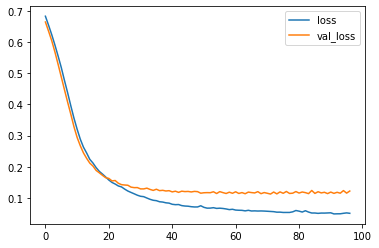

In [28]:
model_loss = pd.DataFrame(model.history.history)
model_loss.plot()

## Example Three: Adding in DropOut Layers

In [29]:
from tensorflow.keras.layers import Dropout

In [30]:
model = Sequential()
model.add(Dense(units=30,activation='relu'))
model.add(Dropout(0.5))

model.add(Dense(units=15,activation='relu'))
model.add(Dropout(0.5))

model.add(Dense(units=1,activation='sigmoid'))
model.compile(loss='binary_crossentropy', optimizer='adam')

In [31]:
model.fit(x=X_train, 
          y=y_train, 
          epochs=600,
          validation_data=(X_test, y_test), verbose=1,
          callbacks=[early_stop]
          )

Epoch 1/600
14/14 [==============================] - 0s 8ms/step - loss: 0.7023 - val_loss: 0.6873
Epoch 2/600
14/14 [==============================] - 0s 3ms/step - loss: 0.6799 - val_loss: 0.6703
Epoch 3/600
14/14 [==============================] - 0s 2ms/step - loss: 0.6635 - val_loss: 0.6468
Epoch 4/600
14/14 [==============================] - 0s 2ms/step - loss: 0.6585 - val_loss: 0.6304
Epoch 5/600
14/14 [==============================] - 0s 2ms/step - loss: 0.6374 - val_loss: 0.6039
Epoch 6/600
14/14 [==============================] - 0s 2ms/step - loss: 0.6071 - val_loss: 0.5707
Epoch 7/600
14/14 [==============================] - 0s 2ms/step - loss: 0.6040 - val_loss: 0.5385
Epoch 8/600
14/14 [==============================] - 0s 2ms/step - loss: 0.5780 - val_loss: 0.5107
Epoch 9/600
14/14 [==============================] - 0s 3ms/step - loss: 0.5390 - val_loss: 0.4802
Epoch 10/600
14/14 [==============================] - 0s 2ms/step - loss: 0.5079 - val_loss: 0.4468
Epoch 11/

14/14 [==============================] - 0s 2ms/step - loss: 0.1012 - val_loss: 0.0760
Epoch 84/600
14/14 [==============================] - 0s 2ms/step - loss: 0.1264 - val_loss: 0.0782
Epoch 85/600
14/14 [==============================] - 0s 3ms/step - loss: 0.1261 - val_loss: 0.0737
Epoch 86/600
14/14 [==============================] - 0s 2ms/step - loss: 0.0946 - val_loss: 0.0811
Epoch 87/600
14/14 [==============================] - 0s 2ms/step - loss: 0.1192 - val_loss: 0.0753
Epoch 88/600
14/14 [==============================] - 0s 2ms/step - loss: 0.1260 - val_loss: 0.0723
Epoch 89/600
14/14 [==============================] - 0s 2ms/step - loss: 0.1155 - val_loss: 0.0781
Epoch 90/600
14/14 [==============================] - 0s 2ms/step - loss: 0.0673 - val_loss: 0.0730
Epoch 91/600
14/14 [==============================] - 0s 2ms/step - loss: 0.1242 - val_loss: 0.0741
Epoch 92/600
14/14 [==============================] - 0s 2ms/step - loss: 0.0986 - val_loss: 0.0771
Epoch 93/600


<AxesSubplot:>

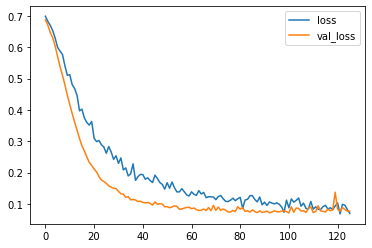

In [32]:
model_loss = pd.DataFrame(model.history.history)
model_loss.plot()

# Model Evaluation

In [33]:
predictions = model.predict_classes(X_test)

/Users/parthamehta/anaconda3/lib/python3.8/site-packages/tensorflow/python/keras/engine/sequential.py:450: UserWarning: `model.predict_classes()` is deprecated and will be removed after 2021-01-01. Please use instead:* `np.argmax(model.predict(x), axis=-1)`,   if your model does multi-class classification   (e.g. if it uses a `softmax` last-layer activation).* `(model.predict(x) > 0.5).astype("int32")`,   if your model does binary classification   (e.g. if it uses a `sigmoid` last-layer activation).
  warnings.warn('`model.predict_classes()` is deprecated and '


In [34]:
from sklearn.metrics import classification_report,confusion_matrix

In [35]:
# https://en.wikipedia.org/wiki/Precision_and_recall
print(classification_report(y_test,predictions))

              precision    recall  f1-score   support

           0       0.96      0.98      0.97        55
           1       0.99      0.98      0.98        88

    accuracy                           0.98       143
   macro avg       0.98      0.98      0.98       143
weighted avg       0.98      0.98      0.98       143



In [36]:
print(confusion_matrix(y_test,predictions))

[[54  1]
 [ 2 86]]
